In [1]:
import os
import pandas as pd
import numpy as np

from datacat4ml.const import CURA_LHD_OR_DIR, CURA_MHD_OR_DIR, CURA_MHD_effect_OR_DIR, CURA_HHD_OR_DIR, CURA_DATA_DIR
from datacat4ml.const import CAT_DATA_DIR
from datacat4ml.Scripts.data_prep.data_curate.curate_utils.standardize_structures import remove_dupMol, log_standard_values
from datacat4ml.Scripts.data_prep.data_curate.curate_utils.select_assays import select_assays

import matplotlib.pyplot as plt
import seaborn as sns

concat_df.shape for CHEMBL233: (8081, 50)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


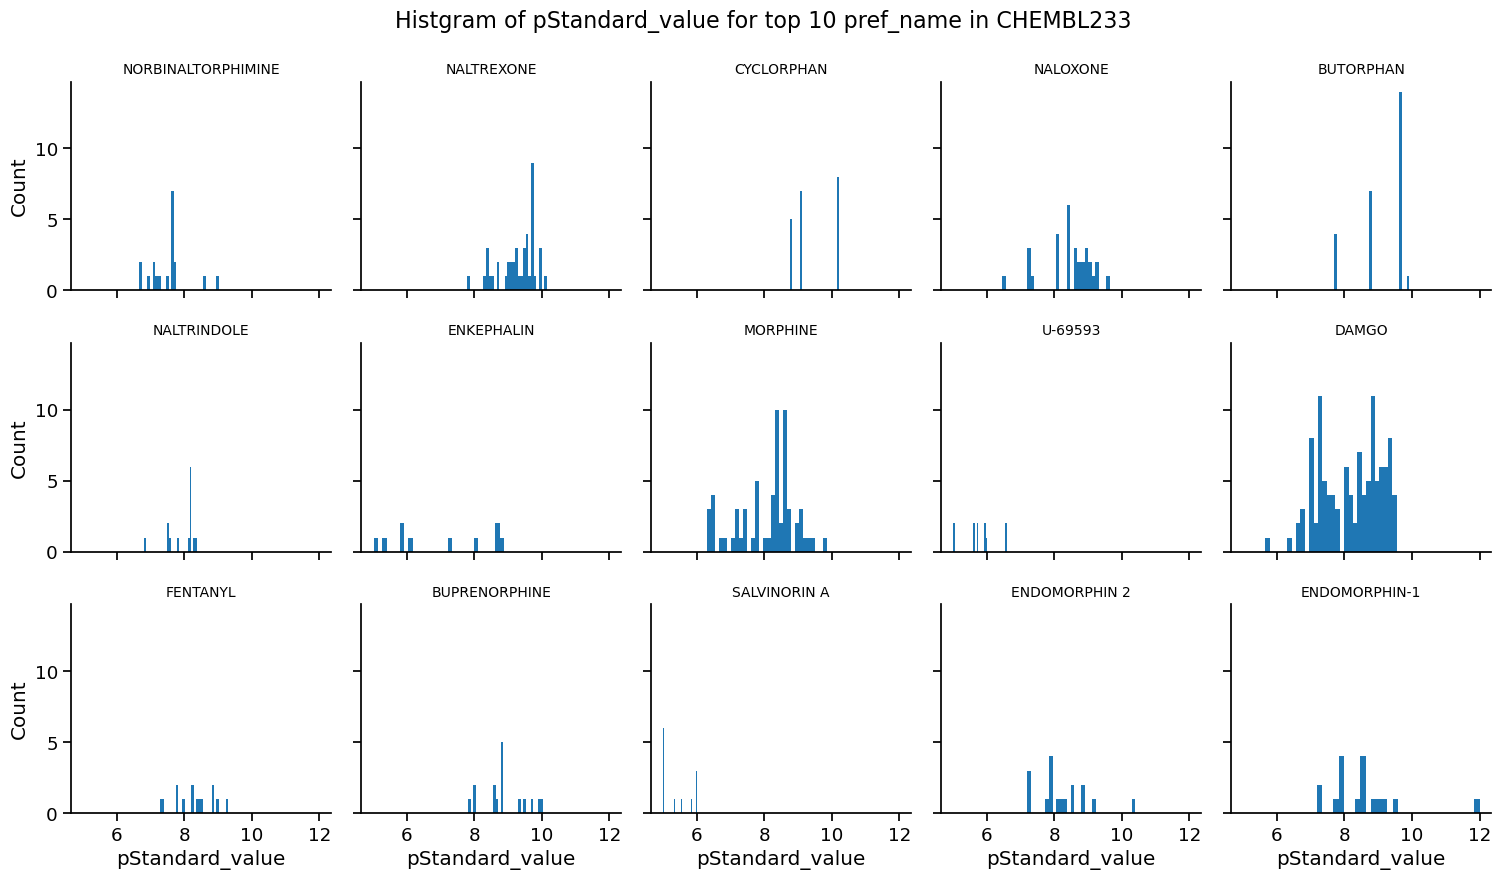

In [ ]:
def read_hml_hd(in_dir=CURA_LHD_OR_DIR, dir_base_name ='rmvDupMol0', f_base_name='CHEMBL233_bind_RBA_Ki_CHEMBL3707592_lhd'):
    for f in os.listdir(os.path.join(in_dir, dir_base_name)):
        if f.startswith(f_base_name):
            df = pd.read_csv(os.path.join(in_dir, dir_base_name, f))
            return df

#===================================================================
# DupMols in a SINGLE dataset
#===================================================================
std_smiles_col='canonical_smiles_by_Std'
pref_name_col='pref_name'
cpd_chemblid_col='compound_chembl_id'

pvalue_col1='standard_value'
pvalue_col2='pStandard_value'

cols_to_show = ['activity_id', 'assay_chembl_id', cpd_chemblid_col, std_smiles_col, pref_name_col, 'standard_type', 'standard_relation', pvalue_col1, pvalue_col2]

def sorted_vc(df, col='canonical_smiles_by_Std'):
    vc = df[col].value_counts()
    # sort vc by the value counts in descending order
    vc = vc.sort_values(ascending=False)
    vc
    return vc

#===================================================================
# Compare DupMols in rmvDupMol0 and rmvDupMol1 datasets
#===================================================================
def plot_diff_col_values(df, df_rmv1, col='pref_name', plot_diff=False):

    vc = df[col].value_counts()
    print(f'len(vc): {len(vc)}')
    col_values = vc.index.tolist()
    #print(f'col: {col_values}')

    vc_rmv1 = df_rmv1[col].value_counts()
    print(f'len(vc_rmv1): {len(vc_rmv1)}')
    col_values_rmv1 = vc_rmv1.index.tolist()
    #print(f'col_values_rmv1: {col_values_rmv1}')

    # get the difference between col_values and col_values_rmv1
    diff_col_values = list(set(col_values) - set(col_values_rmv1))
    print(f'len(diff_col_values): {len(diff_col_values)}')
    print(f'diff_col_values: {diff_col_values}')

    # plot the distribution of the diff_col_values in df
    if plot_diff:
        for n in diff_col_values:
            df[df[col]==n]['pStandard_value'].hist(bins=30)
            plt.title(n)
            plt.show()
    
    return diff_col_values



# CURA_LHD_OR

In [ ]:
# rmvDupMol0
lhd_or_files = [
'CHEMBL2014_bind_RBA_IC50_CHEMBL867087_lhd_b50_b50_curated.csv',
'CHEMBL2014_bind_RBA_Ki_CHEMBL1030622_lhd_b50_b50_curated.csv',
'CHEMBL2014_bind_RBA_Ki_CHEMBL888952_lhd_b50_s50_curated.csv',
'CHEMBL2014_bind_RBA_Ki_CHEMBL892111_lhd_b50_b50_curated.csv',
'CHEMBL233_agon_G-cAMP_EC50_CHEMBL4356649_lhd_b50_b50_curated.csv',
'CHEMBL233_agon_G-GTP_EC50_CHEMBL3887793_lhd_b50_b50_curated.csv',
'CHEMBL233_agon_G-GTP_EC50_CHEMBL4201551_lhd_b50_s50_curated.csv',
'CHEMBL233_antag_G-GTP_IC50_CHEMBL909298_lhd_s50_s50_curated.csv',
'CHEMBL233_bind_RBA_Ki_CHEMBL1030625_lhd_b50_b50_curated.csv',
'CHEMBL233_bind_RBA_Ki_CHEMBL3887789_lhd_b50_b50_curated.csv',
'CHEMBL233_bind_RBA_Ki_CHEMBL4356647_lhd_b50_b50_curated.csv',
'CHEMBL233_bind_RBA_Ki_CHEMBL892114_lhd_b50_b50_curated.csv',
'CHEMBL233_bind_RBA_Ki_CHEMBL909851_lhd_b50_s50_curated.csv',
'CHEMBL236_bind_RBA_Ki_CHEMBL1030623_lhd_b50_b50_curated.csv',
'CHEMBL236_bind_RBA_Ki_CHEMBL3887791_lhd_b50_b50_curated.csv',
'CHEMBL236_bind_RBA_Ki_CHEMBL892112_lhd_b50_b50_curated.csv',
'CHEMBL237_agon_G-GTP_EC50_CHEMBL3887794_lhd_b50_b50_curated.csv',
'CHEMBL237_agon_G-GTP_EC50_CHEMBL910350_lhd_s50_s50_curated.csv',
'CHEMBL237_bind_RBA_Ki_CHEMBL1030624_lhd_b50_b50_curated.csv',
'CHEMBL237_bind_RBA_Ki_CHEMBL3887790_lhd_b50_b50_curated.csv',
'CHEMBL237_bind_RBA_Ki_CHEMBL5253113_lhd_s50_s50_curated.csv',
'CHEMBL237_bind_RBA_Ki_CHEMBL892113_lhd_b50_b50_curated.csv',
'CHEMBL237_bind_RBA_Ki_CHEMBL910349_lhd_b50_s50_curated.csv'
]

## 1. 'CHEMBL233_bind_RBA_Ki_CHEMBL3707592_lhd_b50_s50_curated.csv'

In [ ]:
lhd_df1 = read_hml_hd(f_base_name='CHEMBL233_bind_RBA_Ki_CHEMBL3707592_lhd')
print(f'lhd_df1.shape: {lhd_df1.shape}')

vc = lhd_df1['compound_chembl_id'].value_counts()
print(f'vc: {vc}')

wrong_activity_ids_1 = [
    #compound_chembl_id: CHEMBL3908275    3
    16348719, 16260203,
    #comppund_chembl_id: CHEMBL3948231    3
    16280459, 16285964,
    #comppund_chembl_id: CHEMBL3911529    3
    16338796, 16345420,
    #comppund_chembl_id: CHEMBL3893577    3
    16329322, 16334546,
    #comppund_chembl_id: CHEMBL3954498    3
    16323198, 16325206,
    #comppund_chembl_id: CHEMBL3948400    3
    16353251, 16318808,
    #comppund_chembl_id: CHEMBL3901699    3
    16311427, 16320230,
    #comppund_chembl_id: CHEMBL3664540    3
    16320904, 16329066,
    #comppund_chembl_id: CHEMBL3904663    3
    16311300, 16296171,
    #comppund_chembl_id: CHEMBL3916122    3
    16343355, 16278872,
    #comppund_chembl_id: CHEMBL4107573    3
    17607502, 17607533,
    #comppund_chembl_id: CHEMBL3923372    3
    16330728, 16340093,
    #comppund_chembl_id: CHEMBL3947184    3
    16262862, 16294741,
    #comppund_chembl_id: CHEMBL3907149    3
    16265478, 16268318,
    #comppund_chembl_id: CHEMBL3912511    3
    16309495, 16266350,
    #comppund_chembl_id: CHEMBL3955920    3
    16329500, 16270670,
    #comppund_chembl_id: CHEMBL3919397    3
    16274120, 16305421,
    #comppund_chembl_id: CHEMBL3915488    2
    16301326, 
    #comppund_chembl_id: CHEMBL3951177    2
    16272693,
    #comppund_chembl_id: CHEMBL3946351    2
    16305554, 
    #comppund_chembl_id: CHEMBL3900482    2
    16303895,
    #comppund_chembl_id: CHEMBL3664541    2
    16346449, 16299045,
    #comppund_chembl_id: CHEMBL3944046    2
    16278180,
    #comppund_chembl_id: CHEMBL3892737    2
    16276817,
    #comppund_chembl_id: CHEMBL3664525    2
    16293587, 
    #comppund_chembl_id: CHEMBL3664526    2
    16260396,
    #comppund_chembl_id: CHEMBL3982823    2
    16289441,
    #comppund_chembl_id: CHEMBL3959791    2
    16356146,
    #comppund_chembl_id: CHEMBL3952829    2
    16279037, 
    #comppund_chembl_id: CHEMBL3911769    2             
    16289762
]

#lhd_df1_drop = lhd_df1[~lhd_df1['activity_id'].isin(wrong_activity_ids_1)].reset_index(drop=True)
#print(lhd_df1_drop.shape)
#
#lhd_df1_final = remove_dup_mols(lhd_df1_drop)
#print(lhd_df1_final.shape)

In [ ]:
curated_df = lhd_df1[~lhd_df1['activity_id'].isin(wrong_activity_ids_1)]
print(f'curated_df.shape: {curated_df.shape}')

## 2. 'CHEMBL237_bind_RBA_Ki_CHEMBL4050969_lhd_b50_s50_curated.csv'

In [ ]:
# After checking on the CHEMBL website, it was found that the duplicates are the same compounds with almost the same activity values. So it is save to merge the duplicates into one by taking the mean of the activity values
lhd_df2 = read_hml_hd(f_base_name='CHEMBL237_bind_RBA_Ki_CHEMBL4050969_lhd')
print(f'lhd_df2.shape: {lhd_df2.shape}')

vc = lhd_df2['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n'
    f'vc: {vc}')

In [ ]:
lhd_df2_final = remove_dup_mols(lhd_df2)
print(lhd_df2_final.shape)

## 3. 'CHEMBL233_bind_RBA_Ki_CHEMBL3888831_lhd_b50_s50_curated.csv'

In [ ]:
# After checking the original document, it was found that the duplicates were a pair of polar and non-polar diastereomers.
lhd_df3 = read_hml_hd(f_base_name='CHEMBL233_bind_RBA_Ki_CHEMBL3888831_lhd')
print(f'lhd_df3.shape: {lhd_df3.shape}')

vc = lhd_df3['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:29]

In [ ]:
wrong_activity_ids_3 = [
    #CHEMBL3920864    2
    
    #CHEMBL3982887    2

    #CHEMBL3899387    2

    #CHEMBL3911970    2

    #CHEMBL3898034    2

    #CHEMBL3934183    2

    #CHEMBL3985824    2

    #CHEMBL3977691    2

    #CHEMBL3909426    2

    #CHEMBL3965425    2

    #CHEMBL3928651    2
    #CHEMBL3967435    2
    #CHEMBL3972755    2
    #CHEMBL3907138    2
    #CHEMBL3919659    2
    #CHEMBL3921976    2
    #CHEMBL3929120    2
    #CHEMBL3982651    2
    #CHEMBL3914240    2
    #CHEMBL3889835    2
    #CHEMBL3982674    2
    #CHEMBL3951213    2
    #CHEMBL3928190    2
    #CHEMBL3969636    2
    #CHEMBL3977883    2
    #CHEMBL3937167    2
    #CHEMBL3906866    2
    #CHEMBL3937815    2 
]

## 4.'CHEMBL2014_bind_RBA_Ki_CHEMBL3888830_lhd_b50_s50_curated.csv'

In [ ]:
# After checking the original document, it was found that the duplicates were a pair of polar and non-polar diastereomers.
lhd_df4 = read_hml_hd(f_base_name='CHEMBL2014_bind_RBA_Ki_CHEMBL3888830_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df4.shape: {lhd_df4.shape}')

vc = lhd_df4['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:25]

In [ ]:
wrong_activity_ids_4 = [
    #CHEMBL3943372    2

    #CHEMBL3985824    2
    
    #CHEMBL3928651    2
    #CHEMBL3899387    2
    #CHEMBL3911970    2
    #CHEMBL3898034    2
    #CHEMBL3934183    2
    #CHEMBL3967435    2
    #CHEMBL3977691    2
    #CHEMBL3889835    2
    #CHEMBL3909426    2
    #CHEMBL3965425    2
    #CHEMBL3907138    2
    #CHEMBL3919659    2
    #CHEMBL3921976    2
    #CHEMBL3929120    2
    #CHEMBL3914240    2
    #CHEMBL3982651    2
    #CHEMBL3982674    2
    #CHEMBL3977883    2
    #CHEMBL3969636    2
    #CHEMBL3928190    2
    #CHEMBL3937167    2
    #CHEMBL3951213    2
]

## 5. 'CHEMBL236_bind_RBA_Ki_CHEMBL758175_lhd_b50_s50_curated.csv'

In [ ]:
# after checking the original document, it was found the duplicates were same compound with crystal waters, or racemic isomers.
lhd_df5 = read_hml_hd(f_base_name='CHEMBL236_bind_RBA_Ki_CHEMBL758175_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df5.shape: {lhd_df5.shape}')

vc = lhd_df5['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:7]

In [ ]:
wrong_activity_ids_5 = [
    # CHEMBL169346     3
    # CHEMBL2367916    3
    # CHEMBL299114     3
    # CHEMBL279968     3
    # CHEMBL56585      2
    # CHEMBL301835     2
]

## 6. 'CHEMBL237_bind_RBA_Ki_CHEMBL3887032_lhd_b50_b50_curated.csv'

In [ ]:
# can't access the original document, but the standard_value for most duplicates are exactly the same, some differ within 1 magnitude.
lhd_df6 = read_hml_hd(f_base_name='CHEMBL237_bind_RBA_Ki_CHEMBL3887032_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df6.shape: {lhd_df6.shape}')

vc = lhd_df6['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

In [ ]:
wrong_activity_ids_6 = [
    #CHEMBL3695218    2

    #CHEMBL3647958    2
    
    #CHEMBL3695217    2

    #CHEMBL3647959    2

    #CHEMBL3698892    2

    #CHEMBL3698893    2

    #CHEMBL3647963    2
    
    #CHEMBL3695245    2
]

## 7. 'CHEMBL233_bind_RBA_Ki_CHEMBL3887030_lhd_b50_b50_curated.csv'

In [ ]:
# can't access the original document, but the standard_value for most duplicates are exactly the same, some differ within 1 magnitude.
lhd_df7 = read_hml_hd(f_base_name='CHEMBL233_bind_RBA_Ki_CHEMBL3887030_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df7.shape: {lhd_df7.shape}')

vc = lhd_df7['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

In [ ]:
wrong_activity_ids_7 = [
    #CHEMBL3695217    2

    #CHEMBL3695218    2

    #CHEMBL3698892    2

    #CHEMBL3698893    2

    #CHEMBL3647959    2

    #CHEMBL3647958    2

    #CHEMBL3695245    2
    
    #CHEMBL3647963    2
]

## 8. 'CHEMBL236_bind_RBA_Ki_CHEMBL3887031_lhd_b50_b50_curated.csv'

In [ ]:
# can't access the original document, but the standard_value for most duplicates are exactly the same, some differ within 1 magnitude, some are both inactive. So it is save to merge the duplicates into one.
lhd_df8 = read_hml_hd(f_base_name='CHEMBL236_bind_RBA_Ki_CHEMBL3887031_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df8.shape: {lhd_df8.shape}')

vc = lhd_df8['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

In [ ]:
wrong_activity_ids_8 = [
    #CHEMBL3695217    2

    #CHEMBL3695218    2
    
    #CHEMBL3698892    2

    #CHEMBL3647959    2

    #CHEMBL3698893    2

    #CHEMBL3647958    2

    #CHEMBL3647963    2
    
    #CHEMBL3695245    2
]

## 9. 'CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720_lhd_b50_b50_curated.csv'

In [ ]:
# After checking the original document, it was found that the duplicates are compounds were recorded twice with different activity values. But the activity values are very close to each other.
# So it is save to merge the duplicates into one by taking the mean of the activity values
lhd_df9 = read_hml_hd(f_base_name='CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df9.shape: {lhd_df9.shape}')

vc = lhd_df9['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

In [ ]:
wrong_activity_ids_9 = [
    #CHEMBL3976681    2
    #CHEMBL4111936    2
    #CHEMBL4108710    2
    #CHEMBL3971169    2
    #CHEMBL4106563    2
    #CHEMBL3948713    2
]

## 10. 'CHEMBL237_agon_G-GTP_EC50_CHEMBL3888721_lhd_b50_s50_curated.csv'

In [ ]:
# After checking the original document, it was found that the duplicates are compounds were recorded twice with different activity values. But the activity values are very close to each other.
# So it is save to merge the duplicates into one by taking the mean of the activity values
lhd_df10 = read_hml_hd(f_base_name='CHEMBL237_agon_G-GTP_EC50_CHEMBL3888721_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df10.shape: {lhd_df10.shape}')

vc = lhd_df10['compound_chembl_id'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

In [ ]:
wrong_activity_ids_10 = [
    #CHEMBL4108710    2
    #CHEMBL3948713    2
    #CHEMBL4106563    2
    #CHEMBL3971169    2
    #CHEMBL4111936    2
    #CHEMBL3976681    2
]

## 11. 'CHEMBL233_bind_RBA_Ki_CHEMBL3880325_lhd_b50_b50_curated.csv'

In [ ]:
#The duplicated SMILES correspond same primary structure with very close activity values. So it is save to merge the duplicates into one by taking the mean of the activity values
lhd_df11 = read_hml_hd(f_base_name='CHEMBL233_bind_RBA_Ki_CHEMBL3880325_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df11.shape: {lhd_df11.shape}')

vc = lhd_df11['canonical_smiles_by_Std'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

## 12. 'CHEMBL236_bind_RBA_Ki_CHEMBL3880326_lhd_b50_b50_curated.csv'

In [ ]:
# The duplicated SMILES correspond same primary structure with very close activity values. So it is save to merge the duplicates into one by taking the mean of the activity values
lhd_df12 = read_hml_hd(f_base_name='CHEMBL236_bind_RBA_Ki_CHEMBL3880326_lhd', dir_base_name='rmvDupMol0')
print(f'lhd_df12.shape: {lhd_df12.shape}')

#vc = lhd_df12['compound_chembl_id'].value_counts()
vc = lhd_df12['canonical_smiles_by_Std'].value_counts()
print(f'len(vc): {len(vc)}\n')
vc[:10]

# CURA_MHD_OR

In [3]:
# rmvDupMol0
mhd_or_files = [

'CHEMBL233_bind_RBA_IC50_mhd_b50_b50_curated.csv',
'CHEMBL237_bind_RBA_Ki_mhd_b50_b50_curated.csv',
'CHEMBL237_bind_RBA_IC50_mhd_b50_b50_curated.csv',
'CHEMBL236_bind_RBA_Ki_mhd_b50_b50_curated.csv',
'CHEMBL236_bind_RBA_IC50_mhd_b50_b50_curated.csv',
'CHEMBL2014_bind_RBA_Ki_mhd_b50_b50_curated.csv',
'CHEMBL2014_bind_RBA_IC50_mhd_b50_b50_curated.csv',
'CHEMBL233_agon_G-GTP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL237_agon_G-GTP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL236_agon_G-GTP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL2014_agon_G-GTP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL233_agon_G-Ca_EC50_mhd_b50_b50_curated.csv',
'CHEMBL237_agon_G-Ca_EC50_mhd_b50_b50_curated.csv',
'CHEMBL236_agon_G-Ca_EC50_mhd_s50_s50_curated.csv',
'CHEMBL2014_agon_G-Ca_EC50_mhd_s50_s50_curated.csv',
'CHEMBL233_agon_G-cAMP_IC50_mhd_b50_s50_curated.csv',
'CHEMBL233_agon_G-cAMP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL237_agon_G-cAMP_IC50_mhd_s50_s50_curated.csv',
'CHEMBL237_agon_G-cAMP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL236_agon_G-cAMP_IC50_mhd_s50_s50_curated.csv',
'CHEMBL236_agon_G-cAMP_EC50_mhd_b50_b50_curated.csv',
'CHEMBL2014_agon_G-cAMP_IC50_mhd_b50_b50_curated.csv',
'CHEMBL2014_agon_G-cAMP_EC50_mhd_s50_s50_curated.csv',
'CHEMBL233_agon_B-arrest_EC50_mhd_b50_b50_curated.csv',
'CHEMBL237_agon_B-arrest_EC50_mhd_s50_s50_curated.csv',
'CHEMBL236_agon_B-arrest_EC50_mhd_s50_s50_curated.csv',
'CHEMBL2014_agon_B-arrest_EC50_mhd_s50_s50_curated.csv',
'CHEMBL233_antag_G-GTP_IC50_mhd_b50_b50_curated.csv',
'CHEMBL233_antag_G-GTP_Ki_mhd_b50_b50_curated.csv',
'CHEMBL237_antag_G-GTP_IC50_mhd_b50_b50_curated.csv',
'CHEMBL237_antag_G-GTP_Ki_mhd_b50_b50_curated.csv',
'CHEMBL236_antag_G-GTP_IC50_mhd_b50_b50_curated.csv',
'CHEMBL236_antag_G-GTP_Ki_mhd_b50_b50_curated.csv',
'CHEMBL2014_antag_G-GTP_IC50_mhd_b50_b50_curated.csv',
'CHEMBL2014_antag_G-GTP_Ki_mhd_s50_s50_curated.csv',
'CHEMBL233_antag_B-arrest_IC50_mhd_s50_s50_curated.csv',
'CHEMBL237_antag_B-arrest_IC50_mhd_b50_s50_curated.csv',
'CHEMBL236_antag_B-arrest_IC50_mhd_s50_s50_curated.csv',
]

## 1. 'CHEMBL233_bind_RBA_Ki_mhd_b50_b50_curated.csv',

In [16]:
mhd_df1 = read_hml_hd(in_dir=CURA_MHD_effect_OR_DIR, dir_base_name ='rmvDupMol0', f_base_name='CHEMBL233_bind_mhd-effect_b50_b50_curated.csv')
print(f'mhd_df1.shape: {mhd_df1.shape}')

mhd_df1_rmv1 = read_hml_hd(in_dir=CURA_MHD_effect_OR_DIR, dir_base_name ='rmvDupMol1', f_base_name='CHEMBL233_bind_mhd-effect_b50_b50_curated.csv')
print(f'mhd_df1_rmv1.shape: {mhd_df1_rmv1.shape}')

# the difference rows between mhd_df1 and mhd_df1_rmv1
#diff_cpd_ids = plot_diff_col_values(mhd_df1, mhd_df1_rmv1, col='compound_chembl_id', plot=True)
#diff_pref_names = plot_diff_col_values(mhd_df1, mhd_df1_rmv1, col='pref_name', plot=True)
diff_smiles = plot_diff_col_values(mhd_df1, mhd_df1_rmv1, col='canonical_smiles_by_Std', plot=False)

mhd_df1.shape: (5780, 50)
mhd_df1_rmv1.shape: (4955, 50)
len(vc): 5023
len(vc_rmv1): 4955
len(diff_col_values): 68
diff_col_values: ['NC(=O)c1ccc2c(c1O)[C@]13CCN(CC4CCC4)[C@H](C2)[C@@H]1CC[C@@H](O)C3', 'C[C@H](C1CCC1)N1CC[C@]23CC(=O)CC[C@@]2(O)[C@H]1Cc1ccc(C(N)=O)c(O)c13', 'NC(=O)c1cccc(C2C[C@H]3CC[C@H](C2)N3Cc2c(F)cccc2F)c1', 'NC(=O)c1cccc([C@H]2C[C@H]3CC[C@@H](C2)N3CCN(CC2CCC(F)(F)CC2)C(=O)CO)c1', 'CC(C)NC(=O)N(CCN1[C@@H]2CC[C@H]1C[C@@H](c1cccc(C(N)=O)c1)C2)CC1CCCCC1', 'O=C1NCN(c2ccccc2)C12CCN(C1CCCc3ccccc31)CC2', 'C[C@@]12CCCCC[C@@H](Cc3ccc(C(N)=O)cc31)[C@@H]2N', 'CC1[C@H]2Cc3ccc(O)cc3[C@@]1(C)CCN2[C@@H](C)C1CC1', 'CS(=O)(=O)CC(=O)N(CCN1[C@@H]2CC[C@H]1C[C@@H](c1cccc(C(N)=O)c1)C2)CC1CCCCC1', 'CC(=O)N(C)C1(c2ccccc2)CCC(c2ccccc2)(N(C)C)CC1', 'NC(=O)c1ccc2c(c1O)[C@]13CCN(CC4CCC4)[C@H](C2)[C@]1(O)CC[C@H](O)C3', 'CN(C)S(=O)(=O)N(CCN1[C@@H]2CC[C@H]1C[C@@H](c1cccc(C(N)=O)c1)C2)CC1CCCCC1', 'C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)c2cccc(O)c2)C[C@H]1C', 'CN1CC[C@]23c4cccc(O)c4O[C@H]2CCC

### standard_value: mean and std

In [ ]:
df_group = mhd_df1.groupby(std_smiles_col)[pvalue_col2].agg(['mean', 'std'])
df_group['std'].tolist()


# CURA_MHD_effect_OR_DIR

In [ ]:
mhd_effect_df1 = read_hml_hd(in_dir=CURA_MHD_effect_OR_DIR, dir_base_name ='rmvDupMol0', f_base_name='CHEMBL233_bind')
print(f'mhd_effect_df1.shape: {mhd_effect_df1.shape}')

mhd_effect_df1_rmv1 = read_hml_hd(in_dir=CURA_MHD_effect_OR_DIR, dir_base_name ='rmvDupMol1', f_base_name='CHEMBL233_bind')
print(f'mhd_effect_df1_rmv1.shape: {mhd_effect_df1_rmv1.shape}')

plot_diff_pref_names(mhd_effect_df1, mhd_effect_df1_rmv1)

# CURA_HHD_OR

In [ ]:
hhd_df1 = read_hml_hd(in_dir=CURA_HHD_OR_DIR, dir_base_name ='rmvDupMol0', f_base_name='CHEMBL233_Ki')
print(f'hhd_df1.shape: {hhd_df1.shape}')

hhd_df1_rmv1 = read_hml_hd(in_dir=CURA_HHD_OR_DIR, dir_base_name ='rmvDupMol1', f_base_name='CHEMBL233_Ki')
print(f'hhd_df1_rmv1.shape: {hhd_df1_rmv1.shape}')

plot_diff_pref_names(hhd_df1, hhd_df1_rmv1)